# WK8 Exploratory Data Analysis <hr style="border:2.5px solid #FFC0CB"></hr>

Name:**Wendy Sai D. Infante** <br>
Course:**CPE2A**

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [413]:
df = pd.read_csv(r"..\raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [414]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


## N Chips Manufactured

In [415]:
df_w = df.copy()

In [416]:
chip_count = df_w['Vendor'].value_counts()
chip_count

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

In [417]:
type(chip_count)

pandas.core.series.Series

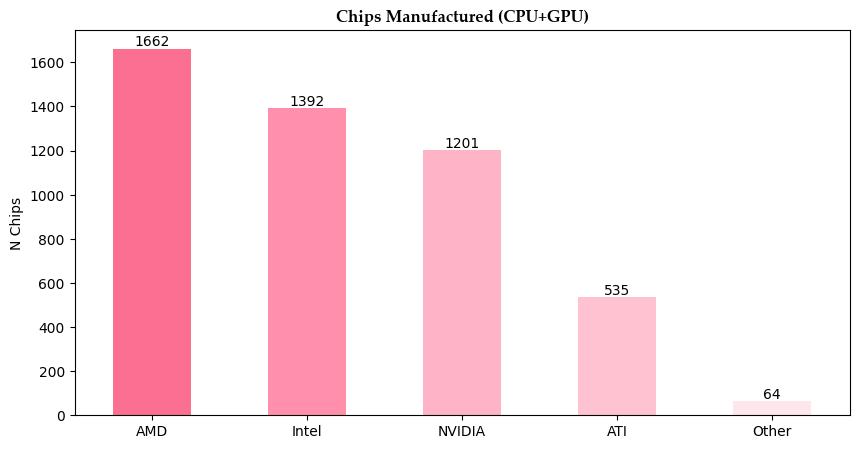

In [418]:
chart = chip_count.plot(kind='bar',color = ['#FB6F92','#FF8FAB','#FFB3C6','#FFC2D1','#FFE5EC'], figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)', fontfamily = 'Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('N Chips')
plt.show()

## N CPU Manufactured

In [419]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel
2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD


In [420]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

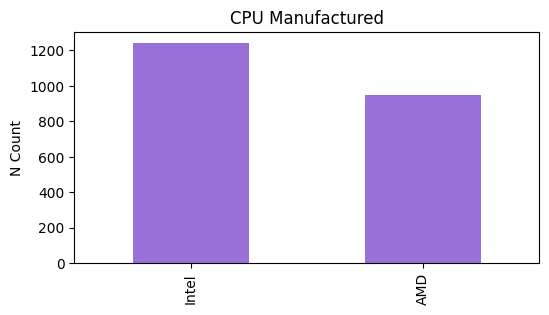

In [421]:
chart = cpu_count.plot(kind='bar',color = ['#996fd8'],figsize=(6,3))
plt.title('CPU Manufactured')
plt.ylabel('N Count')
plt.xlabel('')
plt.show()

## N GPU Manufactured

In [422]:
df_gpu = df_w[df_w['Type']=='GPU']
df_gpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
2192,Intel Xeon E3-1275,GPU,4/3/2011,32.0,95.000000,216.000000,1160.000000,100,Intel,Intel
2193,Matrox Parhelia 128 MB,GPU,6/25/2002,150.0,81.359981,174.000000,80.000000,200,UMC,Other
2194,NVIDIA GeForce MX150 GP107,GPU,2/23/2019,14.0,25.000000,132.000000,3300.000000,1469,Samsung,NVIDIA
2195,Intel GMA 500,GPU,3/2/2008,130.0,81.359981,188.440445,1929.922279,200,Intel,Intel
2196,ATI Radeon HD 4350 AGP,GPU,9/30/2008,55.0,20.000000,73.000000,242.000000,600,TSMC,ATI
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2/22/2011,40.0,75.000000,332.000000,1950.000000,450,TSMC,NVIDIA
4850,Intel GMA 950,GPU,6/1/2005,90.0,7.000000,188.440445,1929.922279,250,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,3/3/2010,40.0,23.000000,100.000000,486.000000,500,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,3/6/2003,150.0,81.359981,65.000000,29.000000,250,TSMC,NVIDIA


In [423]:
gpu_count = df_gpu['Vendor'].value_counts()
gpu_count

Vendor
NVIDIA    1201
AMD        712
ATI        535
Intel      150
Other       64
Name: count, dtype: int64

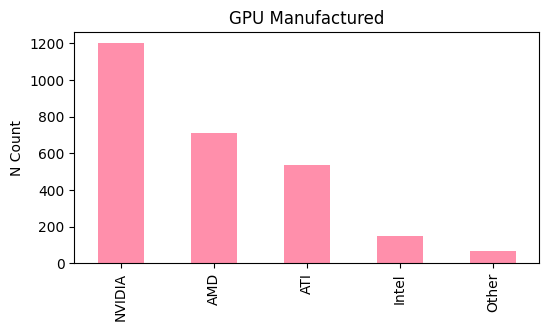

In [424]:
chart = gpu_count.plot(kind='bar',color = ['#FF8FAB'],figsize=(6,3))
plt.title('GPU Manufactured')
plt.ylabel('N Count')
plt.xlabel('')
plt.show()

## CPU Lowest TDP (Thermal Design Power)

In [425]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [426]:
type(df_tdp)

pandas.core.frame.DataFrame

In [427]:
df_tdp = df_tdp.sort_values(by='TDP')
df_tdp

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
...,...,...
4605,NVIDIA Quadro Plex 2100 S4,640.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0


In [428]:
df_tdp = df_tdp.head(7)
df_tdp

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
1761,Intel Atom Z610,1.0
1424,Intel Atom Z510,2.0


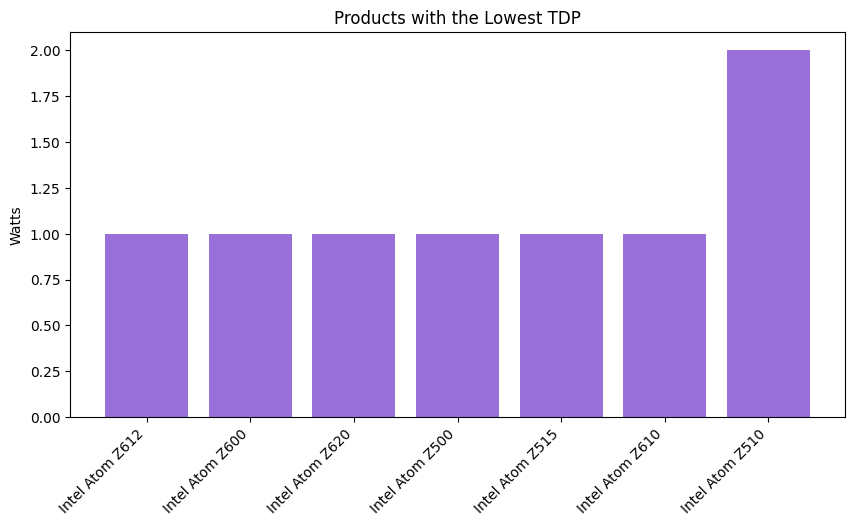

In [429]:
plt.figure (figsize=(10,5))
plt.bar(df_tdp['Product'],df_tdp['TDP'], color='#996fd8')
plt.title('Products with the Lowest TDP')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

## GPU Lowest TDP (Thermal Design Power)

In [430]:
df_gpu_tdp = df_w[df_w['Type'] == 'GPU'][['Product', 'TDP']]

In [431]:
df_gpu_tdp = df_gpu_tdp.sort_values(by='TDP')

In [432]:
df_gpu_tdp = df_gpu_tdp.head(7)

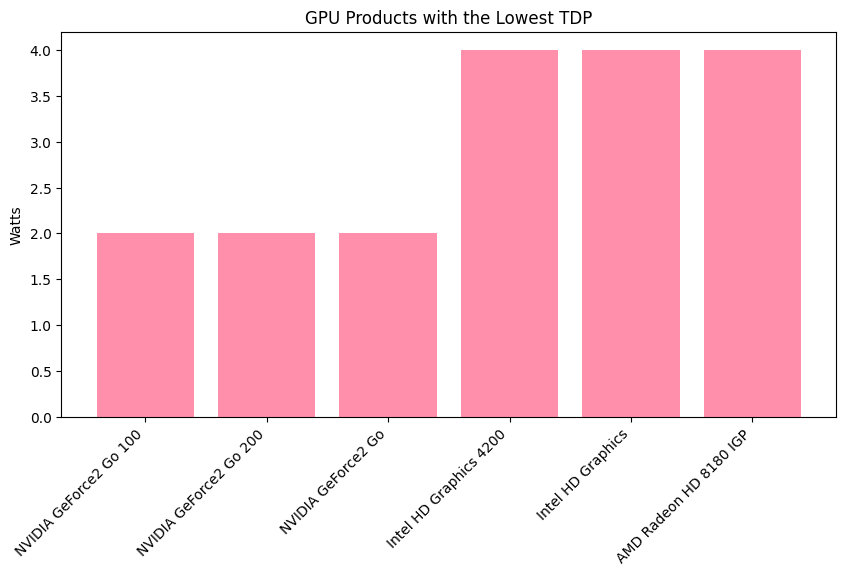

In [433]:
plt.figure(figsize=(10, 5))
plt.bar(df_gpu_tdp['Product'], df_gpu_tdp['TDP'], color='#FF8FAB')
plt.title('GPU Products with the Lowest TDP')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

## CPU Specification Trend

CPU TDP Trend

In [434]:
dfc_ps = df_w[['Type','Date','TDP']].where(df_w['Type']=='CPU').dropna()
dfc_ps

,Type,Date,TDP
0,CPU,2/20/2007,45.0
1,CPU,9/6/2018,35.0
2,CPU,9/2/2020,28.0
3,CPU,9/1/2013,80.0
4,CPU,5/3/2011,125.0
...,...,...,...
2187,CPU,4/6/2021,185.0
2188,CPU,3/16/2020,54.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,85.0


In [435]:
dfc_ps['Date'] = pd.to_datetime(dfc_ps['Date'])
dfc_ps['Year'] = dfc_ps['Date'].dt.year
dfc_ps 

,Type,Date,TDP,Year
0,CPU,2007-02-20,45.0,2007.0
1,CPU,2018-09-06,35.0,2018.0
2,CPU,2020-09-02,28.0,2020.0
3,CPU,2013-09-01,80.0,2013.0
4,CPU,2011-05-03,125.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,185.0,2021.0
2188,CPU,2020-03-16,54.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,85.0,2004.0


In [436]:
dfc_ps = dfc_ps.groupby('Year')['TDP'].mean().reset_index()
dfc_ps

,Year,TDP
0,2000.0,50.470588
1,2001.0,59.186047
2,2002.0,68.487179
3,2003.0,73.630137
4,2004.0,78.250000
5,2005.0,79.525974
6,2006.0,72.822222
7,2007.0,56.608696
8,2008.0,63.589286
9,2009.0,74.426087


Text(0, 0.5, 'Watts')

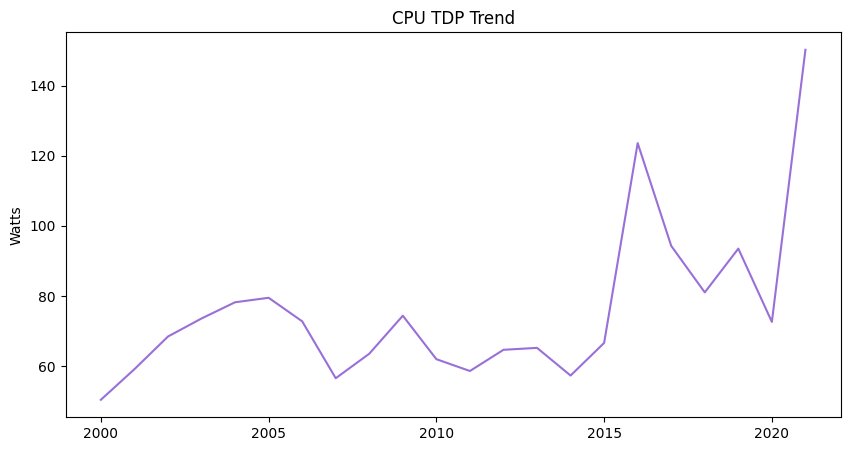

In [437]:
plt.figure(figsize=(10,5))
plt.plot(dfc_ps['Year'],dfc_ps['TDP'], color='#996fd8')
plt.title('CPU TDP Trend')
plt.ylabel('Watts')

CPU Process Size Trend

In [438]:
dfc_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='CPU').dropna()
dfc_ps

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [439]:
dfc_ps['Date'] = pd.to_datetime(dfc_ps['Date'])
dfc_ps['Year'] = dfc_ps['Date'].dt.year
dfc_ps 

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [440]:
dfc_ps = dfc_ps.groupby('Year')['Process_Size'].mean().reset_index()
dfc_ps

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


Text(0, 0.5, 'nm')

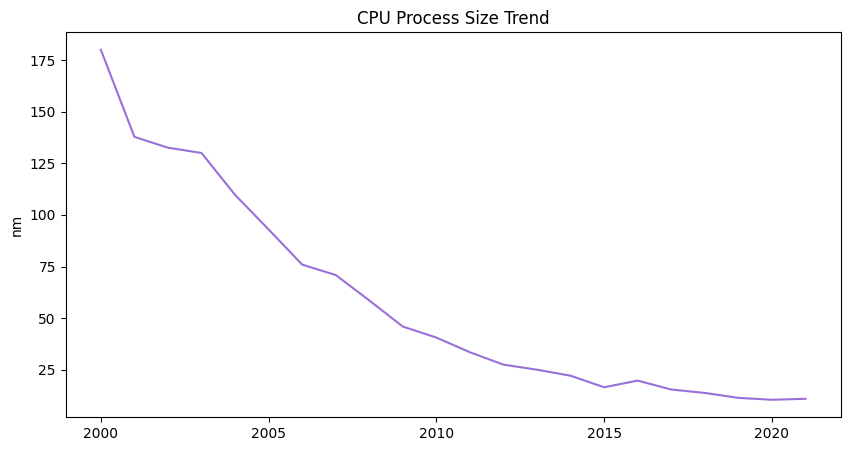

In [441]:
plt.figure(figsize=(10,5))
plt.plot(dfc_ps['Year'],dfc_ps['Process_Size'], color='#996fd8')
plt.title('CPU Process Size Trend')
plt.ylabel('nm')

CPU Die Size Trend

In [442]:
df_ps = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='CPU').dropna()
df_ps

,Type,Date,Die_Size
0,CPU,2/20/2007,77.000000
1,CPU,9/6/2018,192.000000
2,CPU,9/2/2020,188.440445
3,CPU,9/1/2013,160.000000
4,CPU,5/3/2011,258.000000
...,...,...,...
2187,CPU,4/6/2021,188.440445
2188,CPU,3/16/2020,156.000000
2189,CPU,7/1/2007,143.000000
2190,CPU,12/1/2004,188.440445


In [443]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 


,Type,Date,Die_Size,Year
0,CPU,2007-02-20,77.000000,2007.0
1,CPU,2018-09-06,192.000000,2018.0
2,CPU,2020-09-02,188.440445,2020.0
3,CPU,2013-09-01,160.000000,2013.0
4,CPU,2011-05-03,258.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,188.440445,2021.0
2188,CPU,2020-03-16,156.000000,2020.0
2189,CPU,2007-07-01,143.000000,2007.0
2190,CPU,2004-12-01,188.440445,2004.0


In [444]:
df_ps = df_ps.groupby('Year')['Die_Size'].mean().reset_index()
df_ps

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


Text(0, 0.5, 'mm^2')

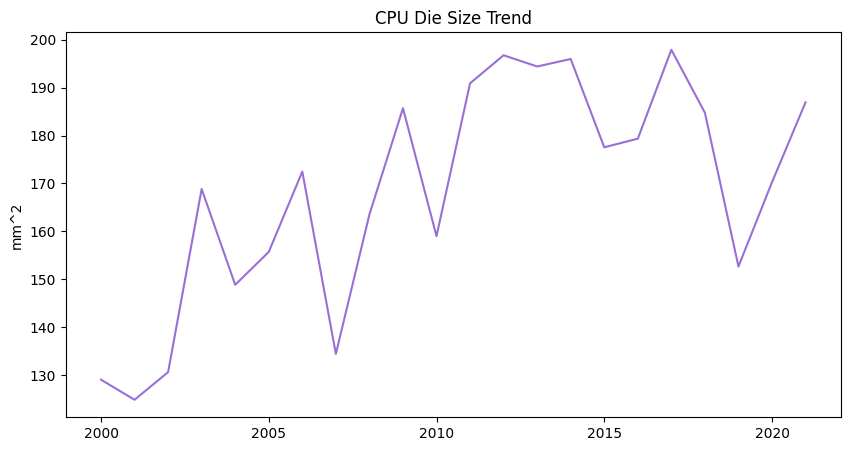

In [445]:
plt.figure(figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Die_Size'], color='#996FD6')
plt.title('CPU Die Size Trend')
plt.ylabel('mm^2')


CPU Transistors Trend

In [446]:
df_ps = df_w[['Type','Date','Transistors']].where(df_w['Type']=='CPU').dropna()
df_ps

,Type,Date,Transistors
0,CPU,2/20/2007,122.000000
1,CPU,9/6/2018,4800.000000
2,CPU,9/2/2020,1929.922279
3,CPU,9/1/2013,1400.000000
4,CPU,5/3/2011,758.000000
...,...,...,...
2187,CPU,4/6/2021,1929.922279
2188,CPU,3/16/2020,9800.000000
2189,CPU,7/1/2007,291.000000
2190,CPU,12/1/2004,106.000000


In [447]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps

,Type,Date,Transistors,Year
0,CPU,2007-02-20,122.000000,2007.0
1,CPU,2018-09-06,4800.000000,2018.0
2,CPU,2020-09-02,1929.922279,2020.0
3,CPU,2013-09-01,1400.000000,2013.0
4,CPU,2011-05-03,758.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,1929.922279,2021.0
2188,CPU,2020-03-16,9800.000000,2020.0
2189,CPU,2007-07-01,291.000000,2007.0
2190,CPU,2004-12-01,106.000000,2004.0


In [448]:
df_ps = df_ps.groupby('Year')['Transistors'].mean().reset_index()
df_ps

,Year,Transistors
0,2000.0,38.000000
1,2001.0,65.197674
2,2002.0,51.846154
3,2003.0,89.315068
4,2004.0,104.213235
5,2005.0,230.580378
6,2006.0,478.256880
7,2007.0,398.007734
8,2008.0,606.076101
9,2009.0,533.860870


Text(0, 0.5, 'million')

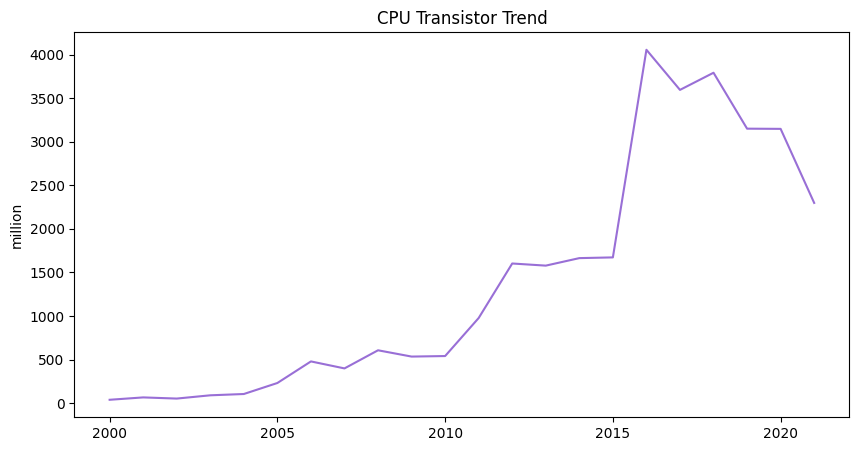

In [449]:
plt.figure(figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Transistors'], color='#996FD6')
plt.title('CPU Transistor Trend')
plt.ylabel('million')

CPU Frequency Trend

In [450]:
df_ps = df_w[['Type','Date','Frequency']].where(df_w['Type']=='CPU').dropna()
df_ps

,Type,Date,Frequency
0,CPU,2/20/2007,2200.0
1,CPU,9/6/2018,3200.0
2,CPU,9/2/2020,2600.0
3,CPU,9/1/2013,1800.0
4,CPU,5/3/2011,3700.0
...,...,...,...
2187,CPU,4/6/2021,2400.0
2188,CPU,3/16/2020,3300.0
2189,CPU,7/1/2007,2333.0
2190,CPU,12/1/2004,2000.0


In [451]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps

,Type,Date,Frequency,Year
0,CPU,2007-02-20,2200.0,2007.0
1,CPU,2018-09-06,3200.0,2018.0
2,CPU,2020-09-02,2600.0,2020.0
3,CPU,2013-09-01,1800.0,2013.0
4,CPU,2011-05-03,3700.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,2400.0,2021.0
2188,CPU,2020-03-16,3300.0,2020.0
2189,CPU,2007-07-01,2333.0,2007.0
2190,CPU,2004-12-01,2000.0,2004.0


In [452]:
df_ps = df_ps.groupby('Year')['Frequency'].mean().reset_index()
df_ps

,Year,Frequency
0,2000.0,992.117647
1,2001.0,1801.662791
2,2002.0,2050.897436
3,2003.0,2155.369863
4,2004.0,2267.705882
5,2005.0,2409.831169
6,2006.0,2370.696296
7,2007.0,2180.652174
8,2008.0,2287.241071
9,2009.0,2519.904348


Text(0, 0.5, 'MHz')

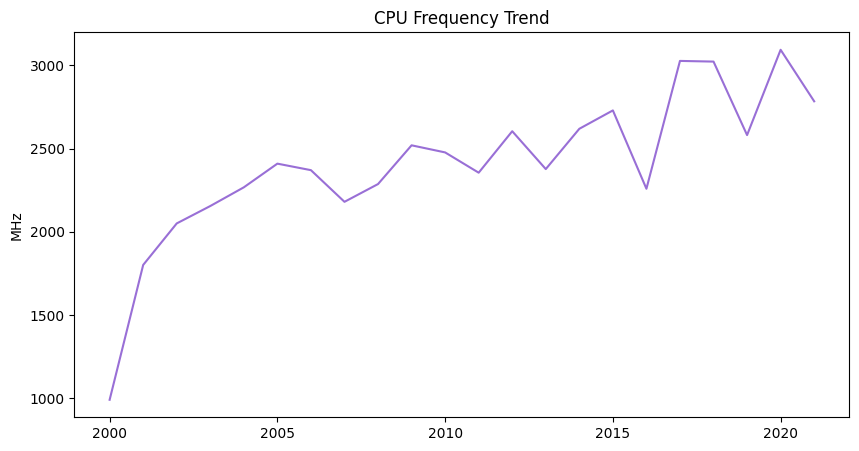

In [453]:
plt.figure(figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Frequency'], color='#996FD6')
plt.title('CPU Frequency Trend')
plt.ylabel('MHz')

## GPU Specification Trend

GPU TDP Trend

In [454]:
dfc_ps = df_w[['Type','Date','TDP']].where(df_w['Type']=='GPU').dropna()
dfc_ps

,Type,Date,TDP
2192,GPU,4/3/2011,95.000000
2193,GPU,6/25/2002,81.359981
2194,GPU,2/23/2019,25.000000
2195,GPU,3/2/2008,81.359981
2196,GPU,9/30/2008,20.000000
...,...,...,...
4849,GPU,2/22/2011,75.000000
4850,GPU,6/1/2005,7.000000
4851,GPU,3/3/2010,23.000000
4852,GPU,3/6/2003,81.359981


In [455]:
dfc_ps['Date'] = pd.to_datetime(dfc_ps['Date'])
dfc_ps['Year'] = dfc_ps['Date'].dt.year
dfc_ps 

,Type,Date,TDP,Year
2192,GPU,2011-04-03,95.000000,2011.0
2193,GPU,2002-06-25,81.359981,2002.0
2194,GPU,2019-02-23,25.000000,2019.0
2195,GPU,2008-03-02,81.359981,2008.0
2196,GPU,2008-09-30,20.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,75.000000,2011.0
4850,GPU,2005-06-01,7.000000,2005.0
4851,GPU,2010-03-03,23.000000,2010.0
4852,GPU,2003-03-06,81.359981,2003.0


In [456]:
dfc_ps = dfc_ps.groupby('Year')['TDP'].mean().reset_index()
dfc_ps

,Year,TDP
0,2000.0,55.258657
1,2001.0,65.297946
2,2002.0,75.419693
3,2003.0,69.121414
4,2004.0,68.908296
5,2005.0,75.262725
6,2006.0,63.032552
7,2007.0,69.652653
8,2008.0,95.534565
9,2009.0,73.114337


Text(0, 0.5, 'Watts')

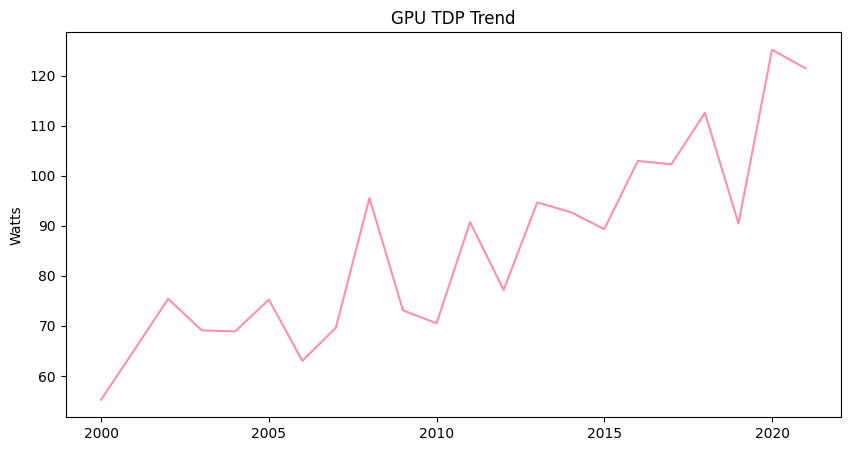

In [457]:
plt.figure(figsize=(10,5))
plt.plot(dfc_ps['Year'],dfc_ps['TDP'], color='#FF8FAB')
plt.title('GPU TDP Trend')
plt.ylabel('Watts')

GPU Process Size Trend

In [458]:
df_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [459]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [460]:
df_ps = df_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_ps

,Year,Process_Size
0,2000.0,189.642857
1,2001.0,165.000000
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.740385


Text(0, 0.5, 'nm')

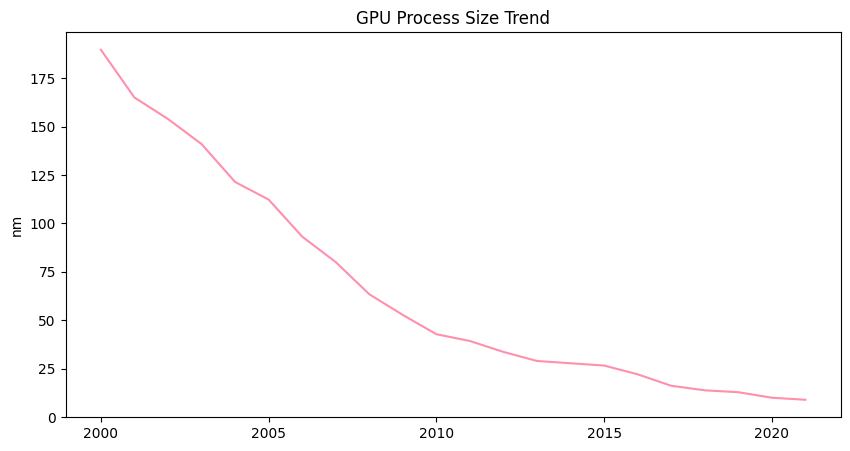

In [461]:
plt.figure(figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Process_Size'], color='#FF8FAB')
plt.title('GPU Process Size Trend')
plt.ylabel('nm')

GPU Die Size Trend

In [462]:
df_ps = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Die_Size
2192,GPU,4/3/2011,216.000000
2193,GPU,6/25/2002,174.000000
2194,GPU,2/23/2019,132.000000
2195,GPU,3/2/2008,188.440445
2196,GPU,9/30/2008,73.000000
...,...,...,...
4849,GPU,2/22/2011,332.000000
4850,GPU,6/1/2005,188.440445
4851,GPU,3/3/2010,100.000000
4852,GPU,3/6/2003,65.000000


In [463]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Die_Size,Year
2192,GPU,2011-04-03,216.000000,2011.0
2193,GPU,2002-06-25,174.000000,2002.0
2194,GPU,2019-02-23,132.000000,2019.0
2195,GPU,2008-03-02,188.440445,2008.0
2196,GPU,2008-09-30,73.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,332.000000,2011.0
4850,GPU,2005-06-01,188.440445,2005.0
4851,GPU,2010-03-03,100.000000,2010.0
4852,GPU,2003-03-06,65.000000,2003.0


In [464]:
df_ps = df_ps.groupby('Year')['Die_Size'].mean().reset_index()
df_ps

,Year,Die_Size
0,2000.0,106.848015
1,2001.0,111.924925
2,2002.0,114.646995
3,2003.0,138.633286
4,2004.0,176.308971
5,2005.0,188.639598
6,2006.0,175.216775
7,2007.0,174.506855
8,2008.0,197.312619
9,2009.0,176.377358


Text(0, 0.5, 'mm^2')

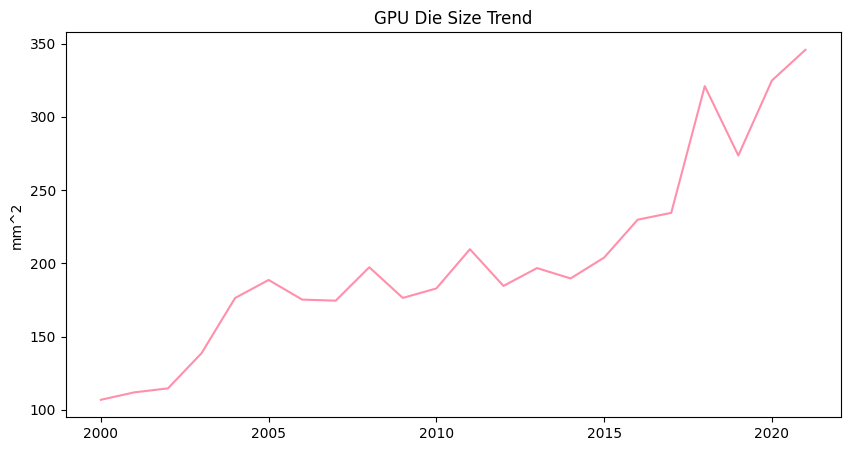

In [465]:
plt.figure(figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Die_Size'], color='#FF8FAB')
plt.title('GPU Die Size Trend')
plt.ylabel('mm^2')

GPU Transistor Trend

In [466]:
df_ps = df_w[['Type','Date','Transistors']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Transistors
2192,GPU,4/3/2011,1160.000000
2193,GPU,6/25/2002,80.000000
2194,GPU,2/23/2019,3300.000000
2195,GPU,3/2/2008,1929.922279
2196,GPU,9/30/2008,242.000000
...,...,...,...
4849,GPU,2/22/2011,1950.000000
4850,GPU,6/1/2005,1929.922279
4851,GPU,3/3/2010,486.000000
4852,GPU,3/6/2003,29.000000


In [467]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Transistors,Year
2192,GPU,2011-04-03,1160.000000,2011.0
2193,GPU,2002-06-25,80.000000,2002.0
2194,GPU,2019-02-23,3300.000000,2019.0
2195,GPU,2008-03-02,1929.922279,2008.0
2196,GPU,2008-09-30,242.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,1950.000000,2011.0
4850,GPU,2005-06-01,1929.922279,2005.0
4851,GPU,2010-03-03,486.000000,2010.0
4852,GPU,2003-03-06,29.000000,2003.0


In [468]:
df_ps = df_ps.groupby('Year')['Transistors'].mean().reset_index()
df_ps

,Year,Transistors
0,2000.0,215.525561
1,2001.0,119.568256
2,2002.0,104.273110
3,2003.0,139.747224
4,2004.0,332.929494
5,2005.0,294.678484
6,2006.0,348.024983
7,2007.0,388.793041
8,2008.0,566.823445
9,2009.0,613.830189


Text(0, 0.5, 'million')

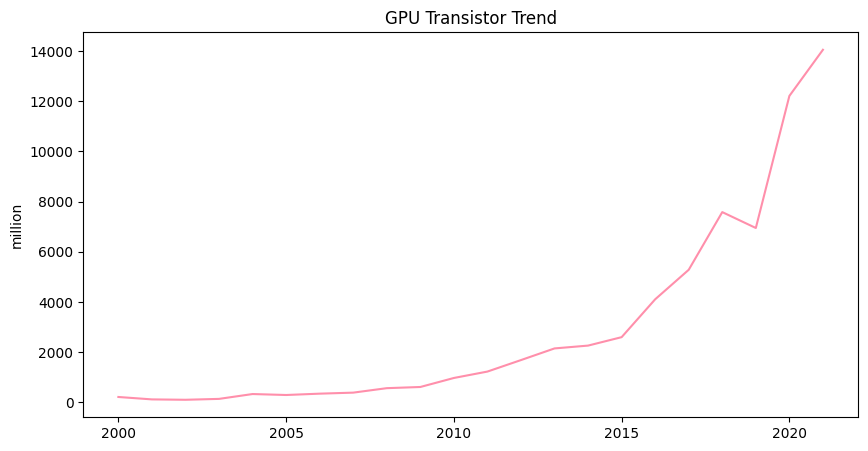

In [469]:
plt.figure(figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Transistors'], color='#FF8FAB')
plt.title('GPU Transistor Trend')
plt.ylabel('million')

GPU Frequency Trend

In [470]:
df_ps = df_w[['Type','Date','Frequency']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Frequency
2192,GPU,4/3/2011,100.0
2193,GPU,6/25/2002,200.0
2194,GPU,2/23/2019,1469.0
2195,GPU,3/2/2008,200.0
2196,GPU,9/30/2008,600.0
...,...,...,...
4849,GPU,2/22/2011,450.0
4850,GPU,6/1/2005,250.0
4851,GPU,3/3/2010,500.0
4852,GPU,3/6/2003,250.0


In [471]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Frequency,Year
2192,GPU,2011-04-03,100.0,2011.0
2193,GPU,2002-06-25,200.0,2002.0
2194,GPU,2019-02-23,1469.0,2019.0
2195,GPU,2008-03-02,200.0,2008.0
2196,GPU,2008-09-30,600.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,450.0,2011.0
4850,GPU,2005-06-01,250.0,2005.0
4851,GPU,2010-03-03,500.0,2010.0
4852,GPU,2003-03-06,250.0,2003.0


In [472]:
df_ps = df_ps.groupby('Year')['Frequency'].mean().reset_index()
df_ps

,Year,Frequency
0,2000.0,165.800000
1,2001.0,196.061224
2,2002.0,244.289855
3,2003.0,304.803571
4,2004.0,367.376923
5,2005.0,405.273684
6,2006.0,460.472868
7,2007.0,524.360759
8,2008.0,564.190751
9,2009.0,584.584906


Text(0, 0.5, 'MHz')

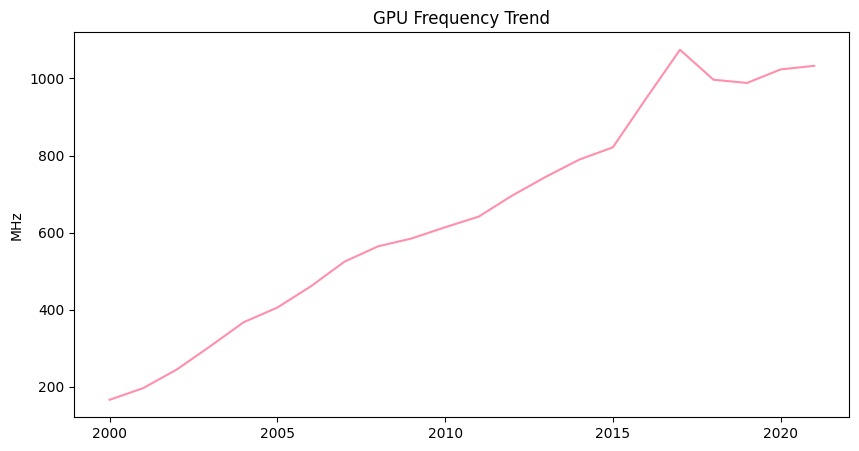

In [473]:

plt.figure(figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Frequency'], color='#FF8FAB')
plt.title('GPU Frequency Trend')
plt.ylabel('MHz')

## Summary

Average **TDP Trend** for **CPU** and **GPU**

In [128]:
cpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "TDP": [50.47, 59.18, 68.48, 73.63, 78.25, 79.52, 72.82, 56.60, 63.58, 74.42, 62.03, 58.66, 64.70, 65.25, 57.37, 66.66, 123.59, 94.31, 81.06, 93.53, 72.65, 150.17]
})

gpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "TDP": [55.25, 65.29, 75.41, 69.12, 68.90, 75.26, 63.03, 69.65, 95.53, 73.11, 70.52, 90.73, 77.17, 	94.64, 92.71, 89.33, 102.94, 102.26, 112.54, 90.46, 125.13,121.43]
})


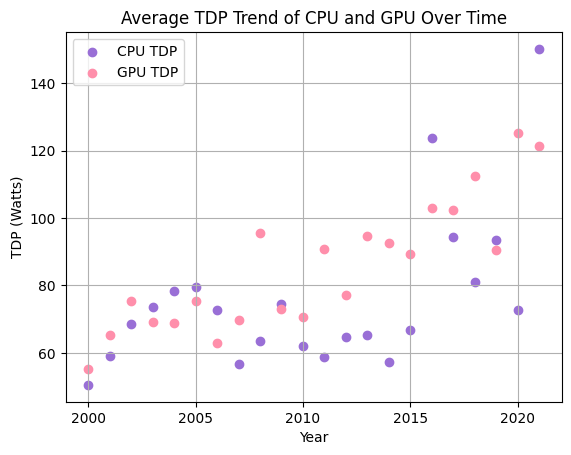

In [129]:
plt.scatter(cpu_ps['Year'], cpu_ps['TDP'], color='#996FD6', label='CPU TDP')
plt.scatter(gpu_ps['Year'], gpu_ps['TDP'], color='#FF8FAB', label='GPU TDP')

plt.title('Average TDP Trend of CPU and GPU Over Time')
plt.xlabel('Year')
plt.ylabel('TDP (Watts)')
plt.legend()
plt.grid(True)
plt.show()

Average **Process size Trend** for **CPU** and **GPU**

In [130]:
cpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Process_Size": [180.0, 137.79, 132.56, 130.0, 109.70, 92.95, 75.92, 70.86, 58.57, 45.91, 40.57, 33.46, 27.45, 25.00, 22.09, 16.50, 19.72, 15.41, 13.76, 11.36, 10.44, 10.92]
})

gpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Process_Size": [189.64, 165.0, 153.91, 140.98, 121.38, 112.31, 93.17, 80.03, 63.43, 52.74, 42.78, 39.28, 33.65, 28.97, 27.79, 26.61, 22.09, 16.18, 13.82, 12.85, 10.0, 8.94]
})


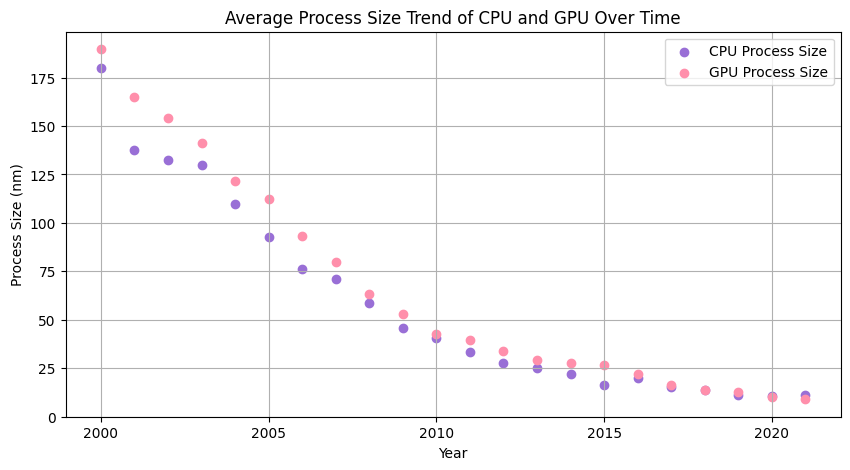

In [131]:
plt.figure(figsize=(10,5))
plt.scatter(cpu_ps['Year'], cpu_ps['Process_Size'], color='#996FD6', label='CPU Process Size')
plt.scatter(gpu_ps['Year'], gpu_ps['Process_Size'], color='#FF8FAB', label='GPU Process Size')

plt.title('Average Process Size Trend of CPU and GPU Over Time')
plt.xlabel('Year')
plt.ylabel('Process Size (nm)')
plt.legend()
plt.grid(True)
plt.show()


Average **Die size Trend** for **CPU** and **GPU**

In [132]:
cpu_df = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Die_Size": [129.05, 124.87, 130.64, 168.83, 148.85, 155.71, 172.47, 134.43, 163.50, 185.69, 159.01, 190.88, 196.74, 194.39, 195.96, 177.54, 179.34, 197.88, 184.74, 152.67, 170.25, 186.92]
})

gpu_df = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Die_Size": [106.84, 111.92, 114.64, 138.63, 176.30, 188.63, 175.21, 174.50, 197.31, 176.37, 182.84, 209.62, 184.56, 196.74, 189.66, 203.90, 229.76, 234.43, 320.95, 273.59, 324.74, 345.74]
})

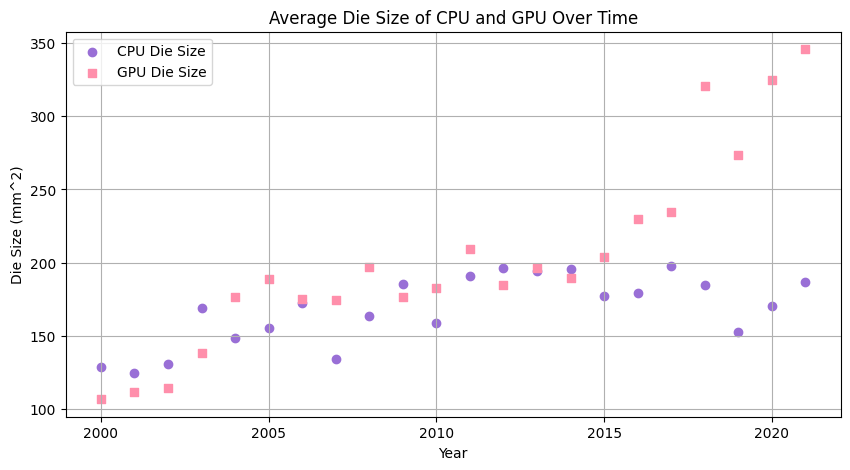

In [133]:
plt.figure(figsize=(10,5))
plt.scatter(cpu_df['Year'], cpu_df['Die_Size'], label='CPU Die Size', color='#996FD6', marker='o')
plt.scatter(gpu_df['Year'], gpu_df['Die_Size'], label='GPU Die Size', color='#FF8FAB', marker='s')

plt.title('Average Die Size of CPU and GPU Over Time')
plt.xlabel('Year')
plt.ylabel('Die Size (mm^2)')
plt.legend()
plt.grid(True)
plt.show()

Average **Transistor Trend** for **CPU** and **GPU**

In [134]:
cpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Transistors": [38, 65.2, 51.8, 89.3, 104.2, 230.6, 478.3, 398.0, 606.1, 533.9, 540.0, 976.6, 1602.2, 1577.8, 1664.0, 1672.3, 4055.3, 3594.9, 3791.7, 3149.9, 3147.6, 2297.7]
})

gpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Transistors": [215.5, 119.6, 104.3, 139.7, 332.9, 294.7, 348.0, 388.8, 566.8, 613.8, 973.0, 1228.2, 1686.0, 2150.4, 2263.1, 2599.2, 4107.9, 5283.6, 7581.6, 6948.5, 12210.5, 14049.4]
})

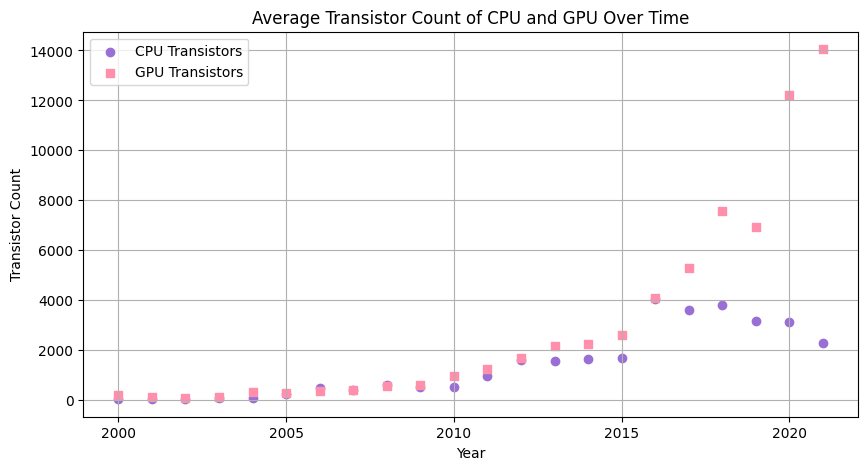

In [135]:
plt.figure(figsize=(10,5))
plt.scatter(cpu_ps['Year'], cpu_ps['Transistors'], label='CPU Transistors', color='#996FD6', marker='o')
plt.scatter(gpu_ps['Year'], gpu_ps['Transistors'], label='GPU Transistors', color='#FF8FAB', marker='s')

plt.title('Average Transistor Count of CPU and GPU Over Time')
plt.xlabel('Year')
plt.ylabel('Transistor Count')
plt.legend()
plt.grid(True)
plt.show()



Average **Frequency Trend** for **CPU** and **GPU**

In [136]:
cpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Frequency": [992.12, 1801.66, 2050.90, 2155.37, 2267.71, 2409.83, 2370.70, 2180.65, 2287.24, 2519.90, 2477.24, 2355.50, 2604.47, 2377.21, 2619.11, 2729.41, 2259.09, 3026.61, 3022.52, 2581.31, 3093.48, 2784.11]
})

gpu_ps = pd.DataFrame({
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Frequency": [165.80, 196.06, 244.29, 304.80, 367.38, 405.27, 460.47, 524.36, 564.19, 584.58, 613.74, 641.36, 696.05, 744.69, 789.40, 821.25, 949.27, 1074.54, 996.77, 988.40, 1023.54, 1032.89]
})

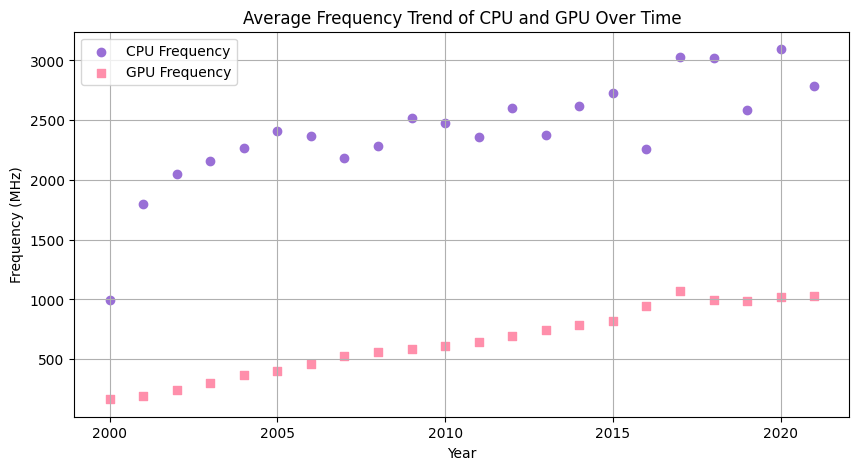

In [137]:
plt.figure(figsize=(10,5))
plt.scatter(cpu_ps['Year'], cpu_ps['Frequency'], label='CPU Frequency', color='#996FD6', marker='o')
plt.scatter(gpu_ps['Year'], gpu_ps['Frequency'], label='GPU Frequency', color='#FF8FAB', marker='s')

plt.title('Average Frequency Trend of CPU and GPU Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.grid(True)
plt.show()
